# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第05课：图的最大连通子图

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）

In [2]:
import igraph as ig
print(ig.__version__)

0.10.4


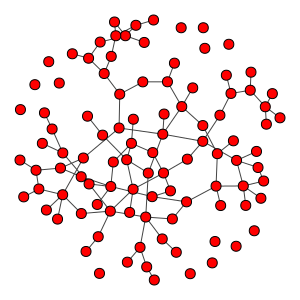

In [3]:
g = ig.Graph.Erdos_Renyi(n=100, m=100)
ig.plot(g, vertex_size=10, bbox=(300, 300))

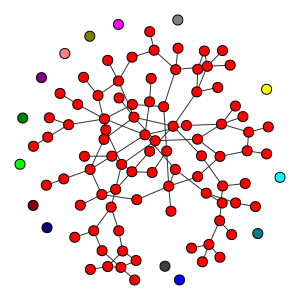

In [4]:
# 可视化连通子图
ig.plot(g.components(), vertex_size=10, bbox=(300, 300))
# ig.plot(g.connected_components(), vertex_size=10, bbox=(300, 300)) # 注意早期版本没有connected_components

#### 官方案例：使用connected_components()可视化图的连通组件
https://igraph.org/python/versions/latest/tutorials/connected_components/connected_components.html

In [5]:
import matplotlib.pyplot as plt

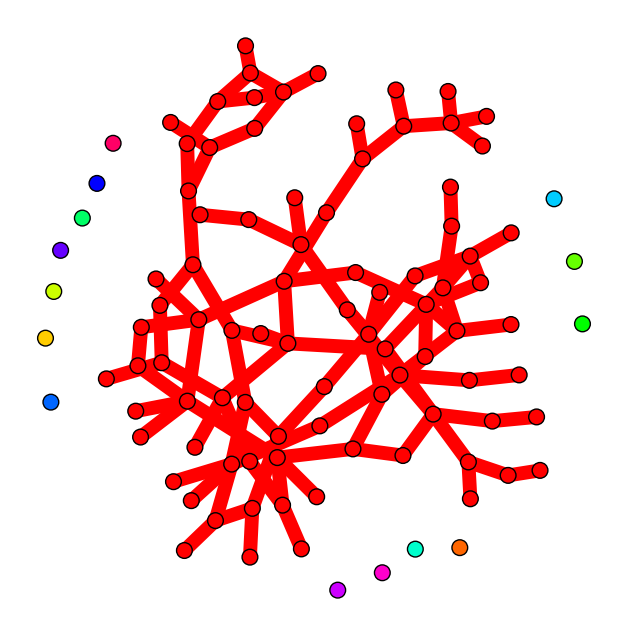

In [6]:
# 突出最大连通子图
fig, ax = plt.subplots(figsize=(8,8))
components = g.components(mode='strong')
# components = g.connected_components(mode='strong')
num_components = len(components)
palette = ig.RainbowPalette(n=num_components)
for i, subgraph in enumerate(components):
    g.vs[subgraph]["color"] = i
    subgraph_edges = g.es.select(_within=subgraph)
    subgraph_edges["color"] = i


ig.plot(
    components,
    palette=palette,
    target=ax,
    vertex_size=0.5,
    edge_width=10.0,
)

plt.show()

In [7]:
# 连通子图的数量
len(components)

15

In [8]:
# 打印最大连通子图包含的节点
print(components[0])
# 获得最大连通子图
LCC = g.induced_subgraph(components[0])

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 98, 99]


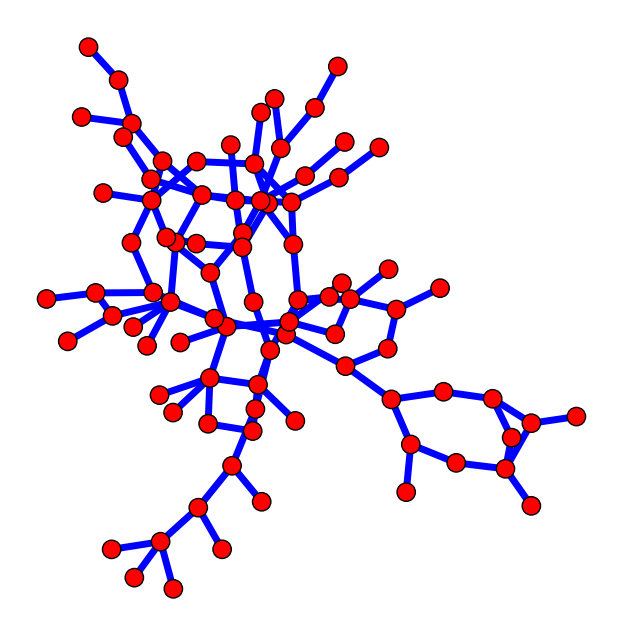

In [9]:
# 可视化最大连通子图
fig, ax = plt.subplots(figsize=(8,8))
ig.plot(
    LCC,
    target=ax,
    palette=palette,
    vertex_size=0.3,
    vertex_color="red",
    edge_color="blue",
    edge_width=5.0,
)

plt.show()

#### ER随机网络的演化

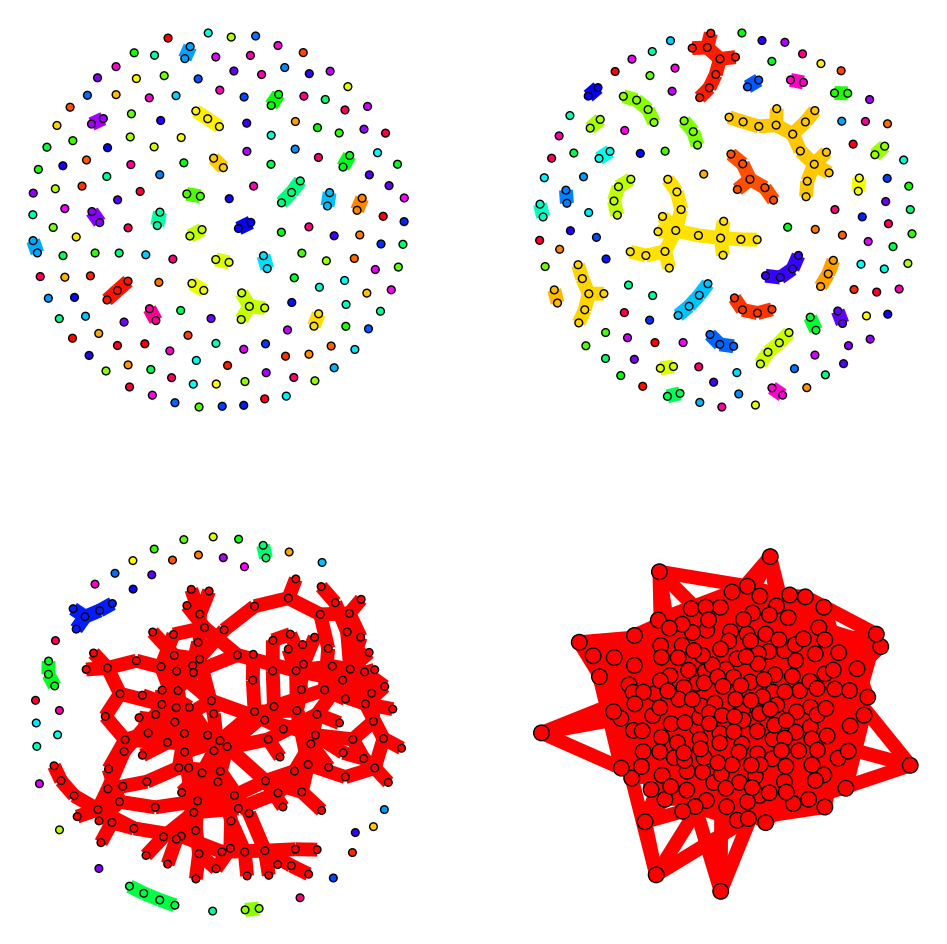

In [10]:
# ER随机网络中巨大连通分量的出现
n = 200
pvals = [0.001, 0.005, 0.01, 0.05]
fig, axes = plt.subplots(2, 2, figsize=(12,12))
for j, p in enumerate(pvals):
    g = ig.Graph.Erdos_Renyi(n=n, p=p)
    components = g.connected_components(mode='strong') # 注意早期版本没有connected_components
    num_components = len(components)
    palette = ig.RainbowPalette(n=num_components)
    for i, subgraph in enumerate(components):
        g.vs[subgraph]["color"] = i
        subgraph_edges = g.es.select(_within=subgraph)
        subgraph_edges["color"] = i

    ig.plot(
        components,
        palette=palette,
        target=axes[j//2,j%2],
        vertex_size=0.5,
        edge_width=10.0,
    )

plt.show()

In [11]:
import numpy as np

In [12]:
# ER随机网络中巨大连通分量占比S(p)与连边概率p之间的依赖关系
def get_Sp(n, pvals):
    Sp = np.zeros(len(pvals))
    for i, p in enumerate(pvals):
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        components = g.connected_components(mode='strong')
        # 获得最大连通子图
        LCC = g.induced_subgraph(components[0])
        n_LCC = LCC.vcount()
        Sp[i] = n_LCC/n
    return Sp

Text(0, 0.5, '$S(p)$')

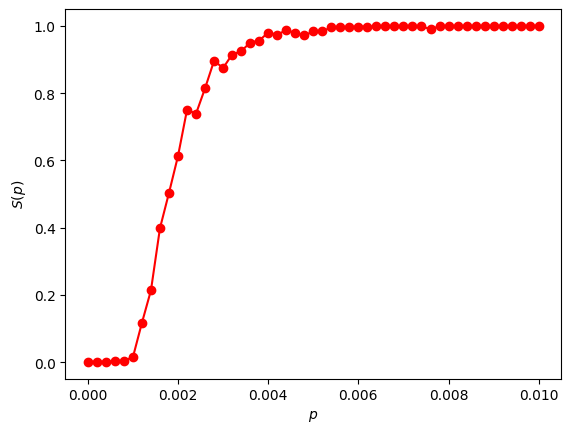

In [13]:
iterations = 100
n = 1000
nums = 51
pvals = np.linspace(0, 0.01, nums)
Sp = np.zeros(nums)
for i in range(iterations):
    Sp += get_Sp(n, pvals)

fig, ax = plt.subplots()
ax.plot(pvals, Sp/iterations, "ro-")
ax.set_xlabel("$p$")
ax.set_ylabel("$S(p)$")